정규분포(normal distribution) 혹은 가우스 정규분포(Gaussian normal distribution)라고 하는 분포는 자연 현상에서 나타나는 숫자를 확률 모형으로 모형화할 때 많이 사용한다.

정규분포는 평균  𝜇 와 분산  𝜎2  이라는 두 모수만으로 정의되며 확률밀도함수(pdf: probability density function)는 다음과 같은 수식으로 표현된다.

$$\mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)$$

분산의 역수를 정밀도(precision)  𝛽 라고 부르기도 한다.

$$\beta = \dfrac{1}{\sigma^2}$$

정규분포 중에서도 평균이 0이고 분산이 1인 ( 𝜇=0 ,  𝜎2=1 ) 정규분포를 표준정규분포(standard normal distribution)라고 한다.

정규분포의 확률밀도함수는 다음과 같은 성질을 가진다.

+ 𝑥=𝜇 일 때 확률밀도가 최대가 된다.
+ 𝑥=∞ 로 다가가거나  𝑥=−∞ 로 다가갈수록 확률밀도가 작아진다.


### SciPy를 이용한 정규분포의 시뮬레이션

Scipy의 stats 서브패키지에 있는 norm 클래스가 정규분포 클래스다. loc 인수로 기댓값  𝜇 를 설정하고 scale 인수로 표준편차  𝜎2‾‾‾√ 를 설정한다.

In [1]:
import scipy as sp
import scipy.stats

mu = 0
std = 1
rv = sp.stats.norm(mu, std) 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

pdf 메서드를 사용하면 확률밀도함수를 계산할 수 있다.

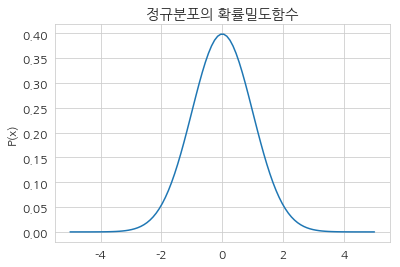

In [4]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("P(x)")
plt.title("정규분포의 확률밀도함수")
plt.show()

시뮬레이션을 통해 표본을 얻으려면 rvs 메서드를 사용한다.

In [5]:
np.random.seed(0)
x = rv.rvs(20)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

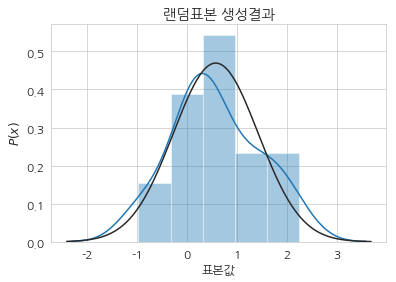

In [6]:
sns.distplot(x, kde=True, fit=sp.stats.norm)
plt.title("랜덤표본 생성결과")
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.show()

### Q-Q 플롯

정규분포는 여러 연속확률분포 중에서도 가장 널리 사용되는 확률분포다. 어떤 확률변수의 분포가 정규분포인지 아닌지 확인하는 정규분포 검정(normality test)은 중요한 통계적 분석이다.

Q-Q(Quantile-Quantile) 플롯은 분석할 표본 데이터의 분포와 정규분포의 분포 형태를 비교하여 표본 데이터가 정규분포를 따르는지 검사하는 간단한 시각적 도구다. 

Q-Q 플롯은 동일 분위수에 해당하는 정상 분포의 값과 주어진 데이터값을 한 쌍으로 만들어 그린 스캐터 플롯(scatter plot)이다. Q-Q 플롯을 그리는 방법은 다음과 같다(여기에서는 대략적인 방법론을 서술했으며 세부적인 사항은 다를 수 있다).

1. 표본 데이터를 정렬(sort)한다.

2. 하나 하나의 표본 데이터가 전체 데이터 중의 몇 % 정도에 해당하는지 위칫값을 구한다. 특정 순위(order)의 값이 나타날 가능성이 높은 값을 뜻하는 순서 통계량(order statistics)이라는 값을 이용한다.

3. 각 표본 데이터의 위칫값이 정규분포의 누적확률함수(cdf) 값이 되는 표준 정규분포의 표본값을 구한다. 즉 확률값에 대한 누적확률함수의 역함수 값을 구한다. 이를 표본 정규분포의 분위함수(quantile function)값이라고 한다. 예를 들어 표본 정규분포의 1%의 분위함수값은  𝐹−1(0.01) , 약 -2.326이다.

4. 표본 데이터와 그에 대응하는 분위수를 하나의 쌍으로 간주하여 2차원 공간에 하나의 점(point)으로 그린다.

5. 모든 표본에 대해 2부터 4까지의 과정을 반복하여 스캐터 플롯을 완성한다.

정규분포를 따르는 데이터 표본을 Q-Q 플롯으로 그리면 다음과 같이 직선의 형태로 나타난다.

In [7]:
# 1. 데이터 정렬
x_sorted = np.sort(x)
x_sorted

array([-0.97727788, -0.85409574, -0.20515826, -0.15135721, -0.10321885,
        0.12167502,  0.14404357,  0.3130677 ,  0.33367433,  0.40015721,
        0.4105985 ,  0.44386323,  0.76103773,  0.95008842,  0.97873798,
        1.45427351,  1.49407907,  1.76405235,  1.86755799,  2.2408932 ])

In [8]:
# 2. 각 데이터들이 전체 데이터 중 몇 % 정도에 해당하는지 위치값 구하기 
from scipy.stats.morestats import _calc_uniform_order_statistic_medians

position = _calc_uniform_order_statistic_medians(len(x))
position

array([0.03406367, 0.08261724, 0.13172109, 0.18082494, 0.2299288 ,
       0.27903265, 0.32813651, 0.37724036, 0.42634422, 0.47544807,
       0.52455193, 0.57365578, 0.62275964, 0.67186349, 0.72096735,
       0.7700712 , 0.81917506, 0.86827891, 0.91738276, 0.96593633])

In [11]:
# 3. 각 표본 데이터의 위칫값이 정규분포의 누적확률함수(cdf) 값이 되는 표준 정규분포의 표본값을 구하기, 누적확률함수의 역함수 값 구하기
qf = rv.ppf(position)
qf

array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
       -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
        0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
        0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ])

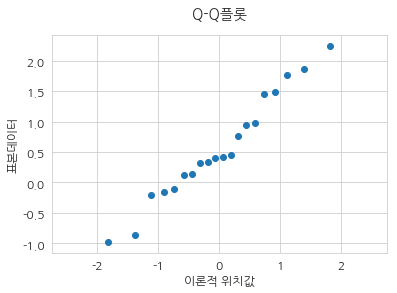

In [15]:
# 4. 표본 데이터와 그에 대응하는 분위수를 하나의 쌍으로 간주하여 2차원 공간에 하나의 점(point)으로 그린다

plt.scatter(qf, x_sorted)
plt.title("Q-Q플롯", y=1.05)
plt.xlabel("이론적 위치값")
plt.ylabel("표본데이터")
plt.axis("equal")
plt.show()

SciPy 패키지의 stats 서브패키지는 Q-Q 플롯을 계산하고 그리기 위한 probplot 명령을 제공한다.

+ http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

probplot은 기본적으로 인수로 보낸 데이터 표본에 대한 Q-Q 플롯 정보만을 반환하고 실제 챠트는 그리지 않는다. 만약 차트를 그리고 싶다면 plot 인수에 matplotlib.pylab 모듈 객체 혹은 Axes 클래스 객체를 넘겨주어야 한다.

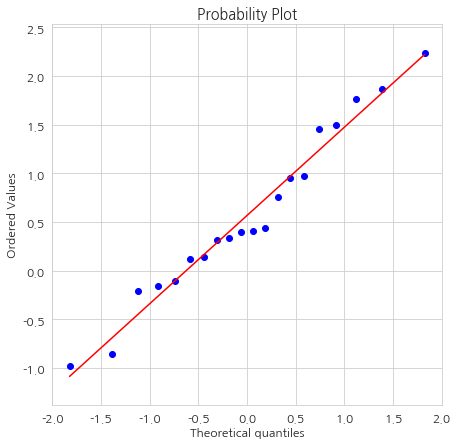

In [18]:
np.random.seed(0)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

정규분포를 따르지 않는 데이터 표본을 Q-Q 플롯으로 그리면 다음과 같이 직선이 아닌 휘어진 형태로 나타난다.

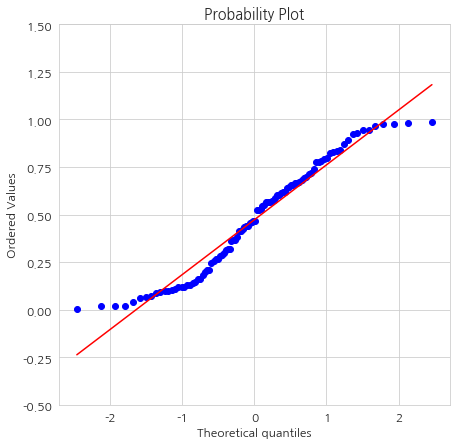

In [19]:
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

### 중심 극한 정리

실세계에서 발생하는 현상 중 많은 것들이 정규분포로 모형화 가능하다. 그 이유 중의 하나는 다음과 같은 중심 극한 정리(Central Limit Theorem)다. 중심 극한 정리는 여러 확률변수의 합이 정규분포와 비슷한 분포를 이루는 현상을 말한다. 중심 극한 정리를 수학적인 용어로 쓰면 다음과 같다.

𝑋1,𝑋2,…,𝑋𝑁 가 기댓값이  𝜇 이고 분산이  𝜎2 으로 동일한 분포이며 서로 독립인 확률변수들이라고 하자. 분포가 어떤 분포인지는 상관없다(기댓값과 분산의 값이 동일할 뿐이며 분포의 모양은 달라도 된다).

𝑋1,𝑋2,…,𝑋𝑁 에서 뽑은 각각의 표본 데이터  𝑥1,𝑥2,…,𝑥𝑁 의 표본 평균

$$\bar{x}_N = \dfrac{1}{N}(x_1+\cdots+x_N)$$

도 마찬가지로 예측할 수 없는 확률변수다. 이 확률변수를  𝑋¯𝑁 이라고 하자.

중심 극한 정리는 다음과 같다.

    "𝑁 개의 임의의 분포로부터 얻은 표본의 평균은  𝑁 이 증가할수록 기댓값이  𝜇 , 분산이  𝜎2 / 𝑁 인 정규분포로 수렴한다."
    
$$\bar{X}_N \xrightarrow{d}\ \mathcal{N}\left(x;\mu,\dfrac{\sigma^2}{N}\right)$$

𝑑  기호는 표본 개수 𝑁이 커질수록 분포의 모양이 특정한 분포에 수렴한다는 것을 뜻한다. 이 표본 평균의 평균이 0, 분산이 1이 되도록 다음과 같이 정규화를 하면 다음과 같이 쓸 수도 있다.

    "𝑁 개의 임의의 분포로부터 얻은 표본의 평균을 정규화하면 𝑁이 증가할 수록 표준정규분포로 수렴한다."
    
$$\dfrac{\bar{X}_N - \mu}{\dfrac{\sigma}{\sqrt{N}}} \xrightarrow{d}\ \mathcal{N}(x;0,1)$$

시뮬레이션을 사용하여 중심 극한 정리가 성립하는지 살펴보도록 하자. 

다음 시뮬레이션에서는 0부터 1까지의 균일 분포(uniform distribution)의 표본을 각각 1번, 2번, 10번 생성하여 그 합의 분포를 보았다. 여기에서는 0부터 1까지의 균일 분포의 기댓값이  1 / 2 , 분산이  1 / 12 라는 사실을 이용했다.

0.49697089297110797 0.2891123170758037
0.49328699278861604 0.289419828621856
0.4993486600729283 0.2888754417931412


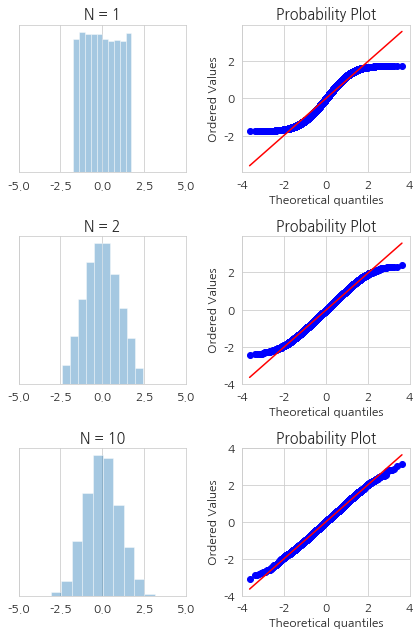

In [28]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)

plt.figure(figsize=(6, 9))

for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(5000, N)  # 5000 x 1, 5000 x 2, 5000 x 10 난수 생성
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)  # 각 표본의 정규화
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt)
    print(X.mean(), X.std())
plt.tight_layout()
plt.show()

더하는 분포의 수가 10개 정도가 되면 그 합은 정규분포에 상당히 가까워짐을 볼 수 있다.

### 정규분포의 통계량 분포

그렇다면 임의의 분포가 아닌 복수의 정규분포로부터 얻은 표본 데이터로 구한 표본평균은 어떤 분포를 가지게 될까?

    "𝑁 개의 정규분포로부터 얻은 표본의 합은 𝑁과 상관없이 기댓값이 𝑁𝜇, 분산이 𝑁𝜎2인 정규분포다."
    
$$x_i \sim \mathcal{N}(\mu, \sigma^2) \;\; \rightarrow \;\; \sum_{i=1}^N x_i \sim \mathcal{N}(N\mu, N\sigma^2)$$


정규분포의 표본에 상수를 빼거나 곱해도 정규분포다. 이 경우에도 위와 같이 기댓값이 0, 표준편차가 1이 되도록 정규화를 하면 다음과 같이 쓸 수 있다.

$$x_i \sim \mathcal{N}(\mu, \sigma^2) \;\; \rightarrow \;\;  z = \dfrac{\bar{x} - \mu}{\dfrac{\sigma}{\sqrt{N}}} \sim \mathcal{N}(x;0,1)$$

정규분포 표본의 평균을 정규화한 통계량을  𝑧  통계량이라고 한다. 중심 극한 정리와 다른 점에 주의해야 한다. 중심 극한 정리에서는 표준정규분포로 점점 다가갈 뿐이고 표본 개수가 무한대가 되기 전에는 정확한 정규분포가 아니지만  𝑧  통계량은 개수  𝑁 에 상관없이 항상 정확하게 표준정규분포이다.

### Practice 1

정규분포로부터 나온  𝑁 개의 표본의 표본평균이 정규분포가 된다는 것을 시뮬레이션과 Q-Q 플롯을 사용하여 보여라.

1. 𝑁=2 일 때
2. 𝑁=10 일 때

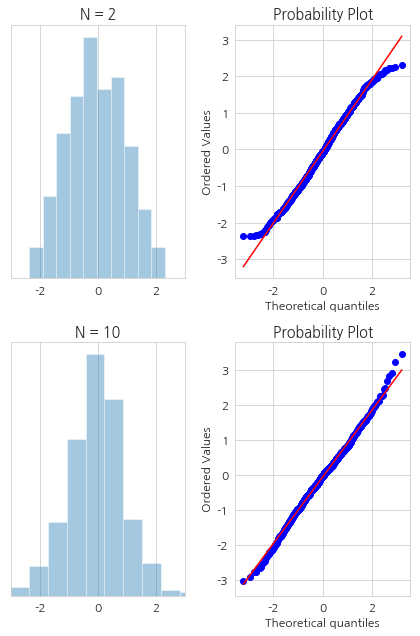

In [32]:
xx = np.linspace(-2, 2, 100)

plt.figure(figsize=(6, 9))

for i, N in enumerate([2, 10]):
    X = np.random.rand(1000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)  
    ax = plt.subplot(2, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-3, 3)
    plt.yticks([])
    ax.set_title("N = {}".format(N))
    plt.subplot(2, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt)
    
plt.tight_layout()
plt.show()

### 정규분포의 활용

정규분포는 선형회귀모형에서 잡음(disturbance)을 모형화하는데 사용된다.

선형회귀모형은 입력변수  𝑥1,…,𝑥𝑁 이 종속변수  𝑦 에 선형적으로 영향을 미치는 모형이다.

$$\hat{y} = w_1 x_1 +  \ldots + w_N x_N \approx y$$

이 모형은 다음과 같이 표현할 수 있다.

$$y = w_1 x_1 +  \ldots + w_N x_N + \epsilon$$

𝜖 은 잡음(disturbance)이라고 하며 우리가 값을 측정할 수 없는 입력변수를 뜻한다.

잡음은 선형회귀모형을 만들 때 하나하나의 영향력이 작거나 일일히 측정하기 힘들어서 무시하는 수많은 변수들의 영향을 하나로 합친 것이다. 즉 원래  𝑦  값은  𝑥1,…,𝑥𝑁,… 의 거의 무한한 개수의 입력변수의 영향을 받는다.

$$y = w_1 x_1 +  \ldots + w_N x_N + w_{N+1} x_{N+1} + w_{N+2} x_{N+2} + \ldots$$

하지만 이 중에서 입력변수  𝑥1,…,𝑥𝑁 만이 영향력이 크거나 측정이 쉽다면 다른 변수의 영향은 하나의 확률변수라고 합쳐서 표현할 수 있다.

$$\epsilon = w_{N+1} x_{N+1} + w_{N+2} x_{N+2} +  \ldots$$

중심 극한 정리에 의해 임의의 확률변수의 합은 정규분포와 비슷한 형태가 된다. 또한  𝜖 의 기댓값이 0이 아니라면 다음처럼 상수항  𝑤0=E[𝜖] 을 추가하는 대신  𝜖 의 기댓값이 0이라고 할 수 있기 때문에

$$y = w_0 + w_1 x_1 +  \ldots + w_N x_N + \epsilon$$

잡음  𝜖 이 기댓값이 0인 정규분포라고 가정하는 것은 합리적이다.

$$\epsilon \sim \mathcal{N}(0, \sigma^2)$$

[그림] 선형회귀모형과 정규분포 : https://datascienceschool.net/upfiles/cddc84375f944de58e60dd4f9b3c91db.png